In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

In [2]:
data= pd.read_csv('LoanStats3a.csv', encoding='latin-1', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [3]:
print("\nData Types of each column:\n", data.dtypes)


Data Types of each column:
 id                              object
member_id                      float64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                obj

In [4]:
# Check for missing values
print(data.isnull().sum())

id                                 1
member_id                          2
loan_amnt                          2
funded_amnt                        2
funded_amnt_inv                    2
term                               2
int_rate                           2
installment                        2
grade                              2
sub_grade                          2
emp_title                       2628
emp_length                      1114
home_ownership                     2
annual_inc                         6
verification_status                2
issue_d                            2
loan_status                        2
pymnt_plan                         2
purpose                            2
title                             15
zip_code                           2
addr_state                         2
dti                                2
delinq_2yrs                       31
earliest_cr_line                  31
inq_last_6mths                    31
mths_since_last_delinq         26928
m

In [5]:
# Check for duplicate rows
duplicates = data[data.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicate rows
df = data.drop_duplicates()
print("Shape of dataset including duplicates",data.shape)
print("Shape of dataset after removing duplicates",df.shape)

Number of duplicate rows: 0
Shape of dataset including duplicates (42537, 56)
Shape of dataset after removing duplicates (42537, 56)


In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcie

In [7]:
data['loan_status'].value_counts()

,count
loan_status,
Fully Paid,33314
Charged Off,5640
Does not meet the credit policy. Status:Fully Paid,1988
Current,781
Does not meet the credit policy. Status:Charged Off,761
In Grace Period,22
Late (31-120 days),17
Late (16-30 days),8
Default,4


In [8]:
data['loan_status'] = data['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
data['loan_status'] = data['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')
data['loan_status'].value_counts()

,count
loan_status,
Fully Paid,35302
Charged Off,6401
Current,781
In Grace Period,22
Late (31-120 days),17
Late (16-30 days),8
Default,4


In [9]:
# prompt: In loan_status column, remove all rows which does not have either 'Fully Paid' or 'Charged Off' and change them to 0 and 1 respectively

data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]
data['loan_status'] = data['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})
data['loan_status'].value_counts()

,count
loan_status,
0,35302
1,6401


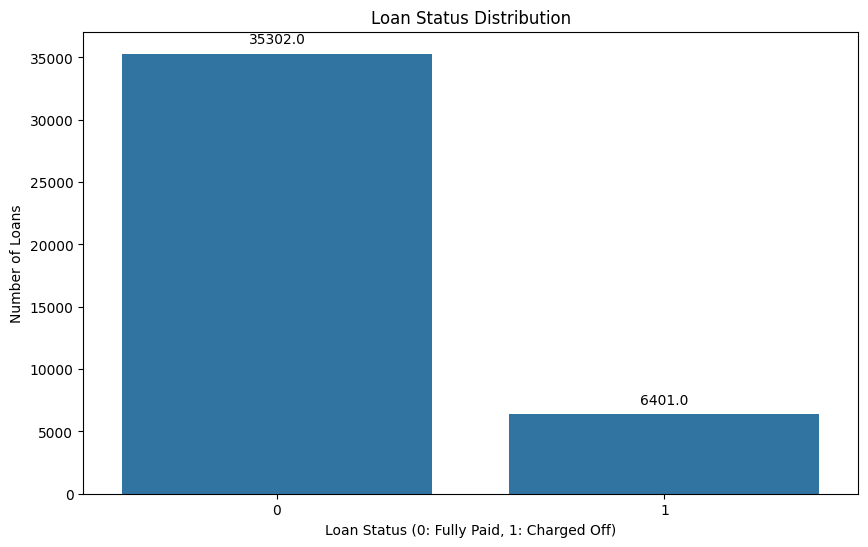

In [10]:
# prompt: visualize loan_status barplot and print values of bas

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0: Fully Paid, 1: Charged Off)')
plt.ylabel('Number of Loans')

# Print the values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


In [11]:
for col in data.columns:
    if len(data[col].value_counts()) == 1:
        print(f"Dropping column '{col}' as it has only one unique value.")
        data = data.drop(col, axis=1)
data.head()

Dropping column 'initial_list_status' as it has only one unique value.
Dropping column 'out_prncp' as it has only one unique value.
Dropping column 'out_prncp_inv' as it has only one unique value.
Dropping column 'collections_12_mths_ex_med' as it has only one unique value.
Dropping column 'policy_code' as it has only one unique value.
Dropping column 'application_type' as it has only one unique value.
Dropping column 'chargeoff_within_12_mths' as it has only one unique value.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,Jul-16,NaN,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,NaN,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,Jul-16,NaN,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,NaN,0.0,0.0,0.0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,Jan-15,161.03,NaN,Jan-16,NaN,0.0,0.0,0.0,0.0


In [12]:
data=data.drop(['id', 'member_id','emp_title', 'issue_d', 'pymnt_plan', 'zip_code','mths_since_last_major_derog', 'acc_now_delinq','delinq_amnt', 'tax_liens',  ],axis=1)

In [13]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [14]:
for c in data.columns:
  print("\n{c} column".format(c=c))
  print(data[c].value_counts())


loan_amnt column
loan_amnt
10000.0    2999
12000.0    2381
5000.0     2244
6000.0     2026
15000.0    1970
           ... 
11775.0       1
550.0         1
13525.0       1
850.0         1
20425.0       1
Name: count, Length: 884, dtype: int64

funded_amnt column
funded_amnt
10000.0    2909
12000.0    2292
5000.0     2231
6000.0     2012
15000.0    1857
           ... 
2025.0        1
12975.0       1
17225.0       1
20775.0       1
18775.0       1
Name: count, Length: 1034, dtype: int64

funded_amnt_inv column
funded_amnt_inv
5000.000000     1360
10000.000000    1293
6000.000000     1232
12000.000000    1049
8000.000000      923
                ... 
6038.555969        1
14410.907000       1
10363.556250       1
19091.849530       1
15118.360000       1
Name: count, Length: 9124, dtype: int64

term column
term
36 months    31534
60 months    10169
Name: count, dtype: int64

int_rate column
int_rate
10.99%    953
11.49%    819
7.51%     787
13.49%    777
7.88%     742
         ... 
21.48%

In [15]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,Jul-16,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,Jul-16,0.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0


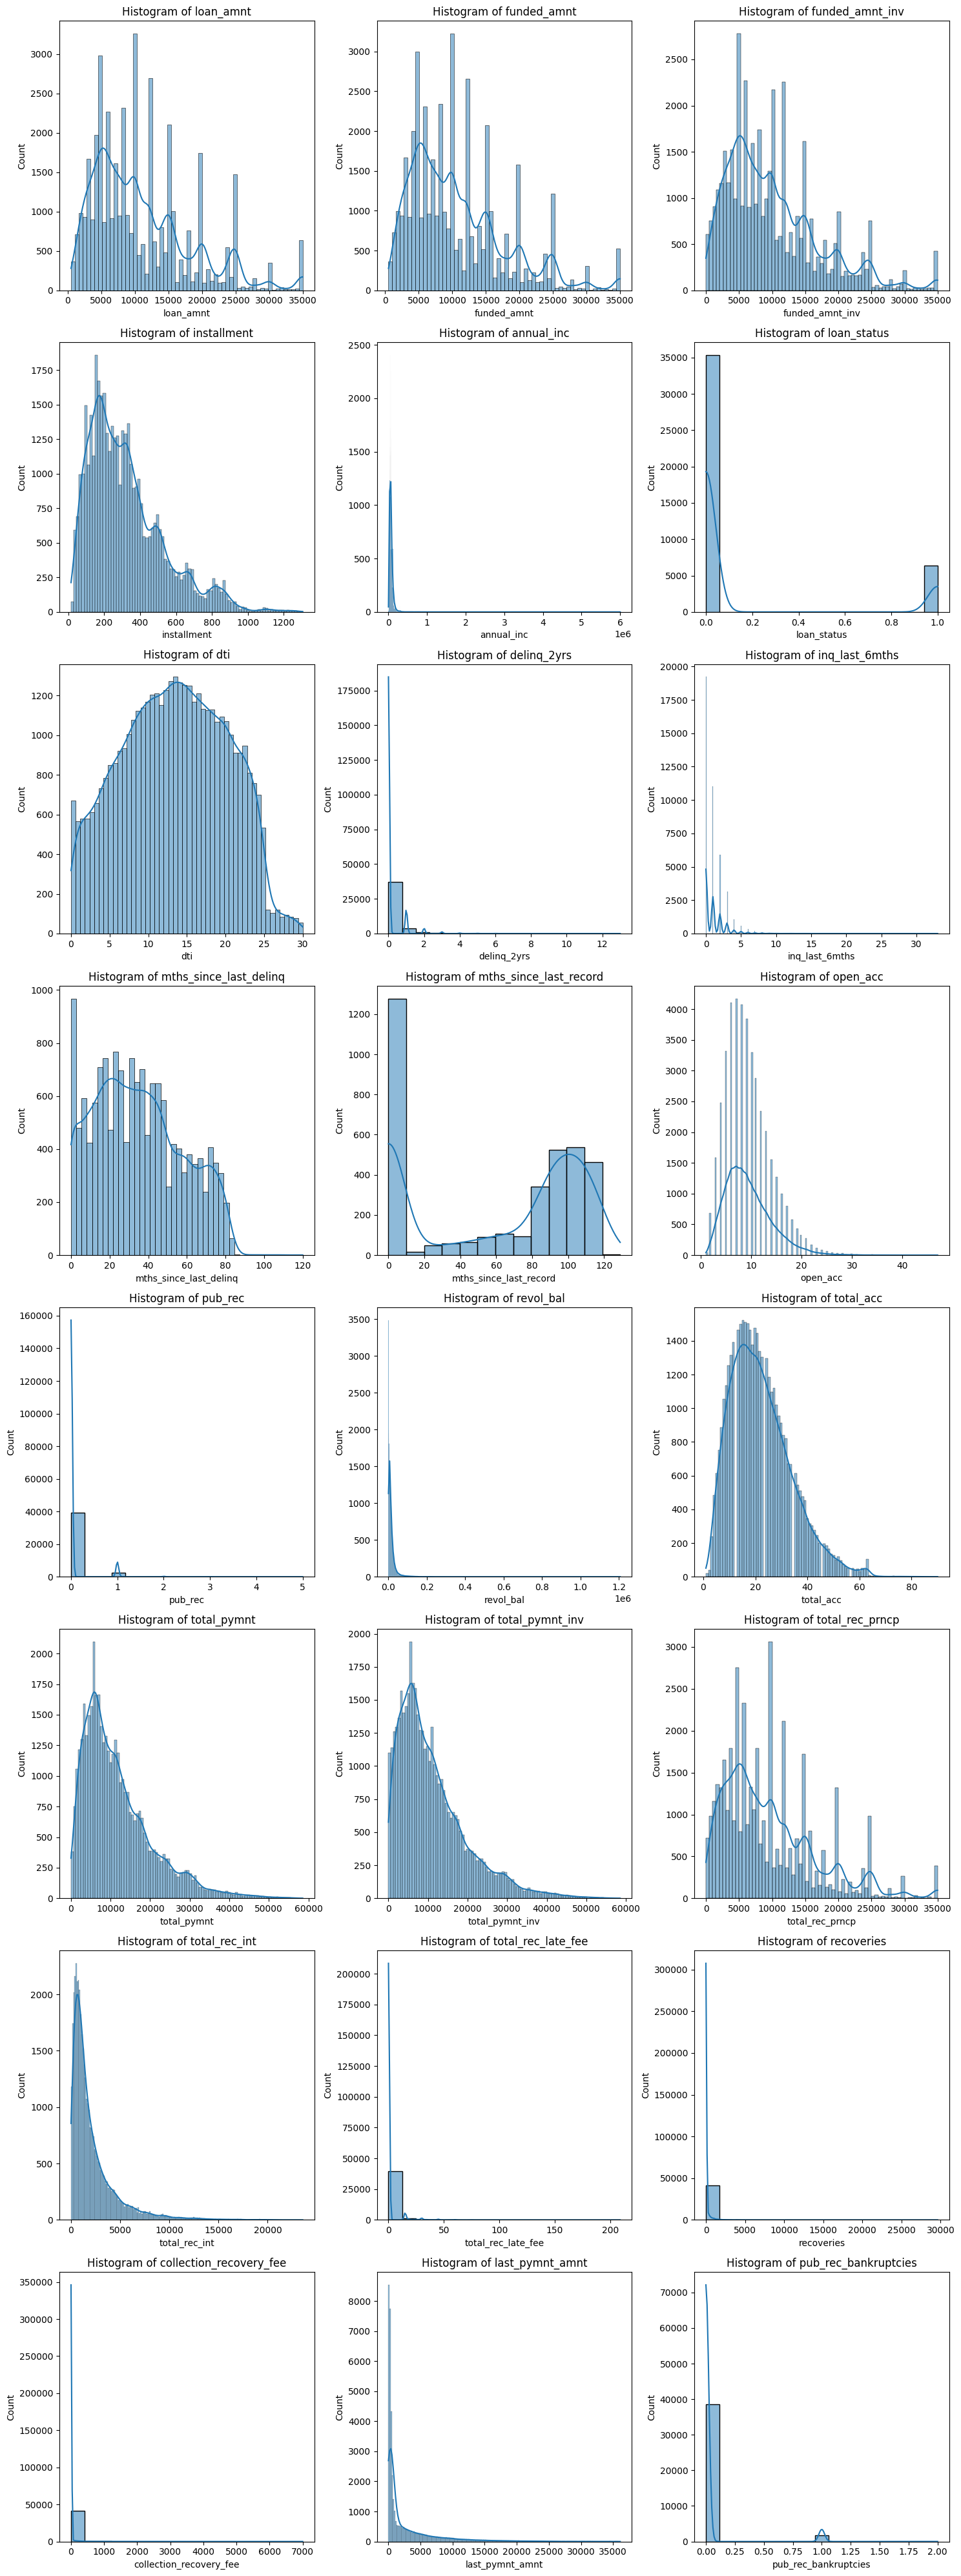

In [16]:

numeric_cols = data.select_dtypes(include=np.number).columns

# Plot histograms for numeric columns in 3 columns
num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numeric_cols):
    if i < num_plots:
        sns.histplot(data[col].dropna(), kde=True, ax=axes[i]) # Drop NaN values before plotting
        axes[i].set_title(f'Histogram of {col}')
    else:
        axes[i].axis('off')  # Hide any extra subplots

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

try:
    df = pd.read_csv('LoanStats3a.csv', encoding='latin-1', low_memory=False)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'LoanStats3a.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


(42537, 56)


Descriptive Statistics for Numerical Features:
           loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  41703.000000  41703.000000     41703.000000  41703.000000   
mean   10960.133564  10696.407932     10004.117898    320.863878   
std     7325.499171   7065.586077      7041.533322    208.574626   
min      500.000000    500.000000         0.000000     15.670000   
25%     5000.000000   5000.000000      4900.000000    164.850000   
50%     9600.000000   9250.000000      8380.785186    275.960000   
75%    15000.000000  15000.000000     13975.000000    424.120000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc   loan_status           dti   delinq_2yrs  inq_last_6mths  \
count  4.169900e+04  41703.000000  41703.000000  41674.000000    41674.000000   
mean   6.898033e+04      0.153490     13.344008      0.152757        1.087657   
std    6.438305e+04      0.360464      6.724875      0.512871        1.535264   
min    1.896000

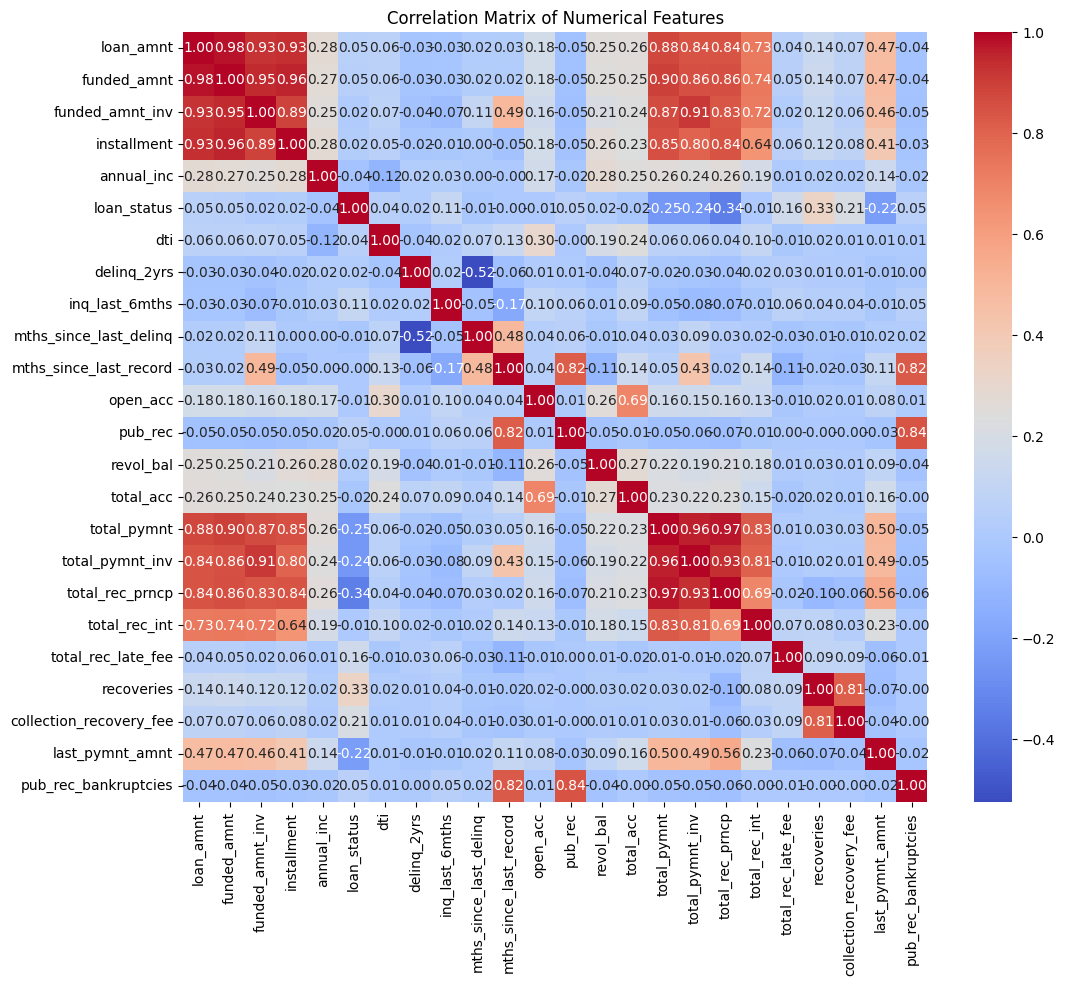

In [18]:
numerical_cols = data.select_dtypes(include=['number']).columns
descriptive_stats = data[numerical_cols].describe()
print("Descriptive Statistics for Numerical Features:\n", descriptive_stats)

correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, missing values, and the distribution of key variables.



In [19]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Identify data types of each column
print("\nData Types of each column:\n", df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)

# Analyze the distribution of key numerical and categorical variables
print("\nSummary Statistics of Numerical Features:\n", df.describe())

# Examine unique values and frequencies for categorical variables (example: loan_status)
print("\nUnique Values and Frequencies for 'loan_status':\n", df['loan_status'].value_counts())
print("\nUnique Values and Frequencies for 'home_ownership':\n", df['home_ownership'].value_counts())

Shape of the DataFrame: (42537, 56)

Data Types of each column:
 id                              object
member_id                      float64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64

## Data visualization

### Subtask:
Visualize the distributions of key numerical and categorical features in the dataset.


**Reasoning**:
Create histograms for numerical features and bar plots for categorical features to visualize the data distributions.



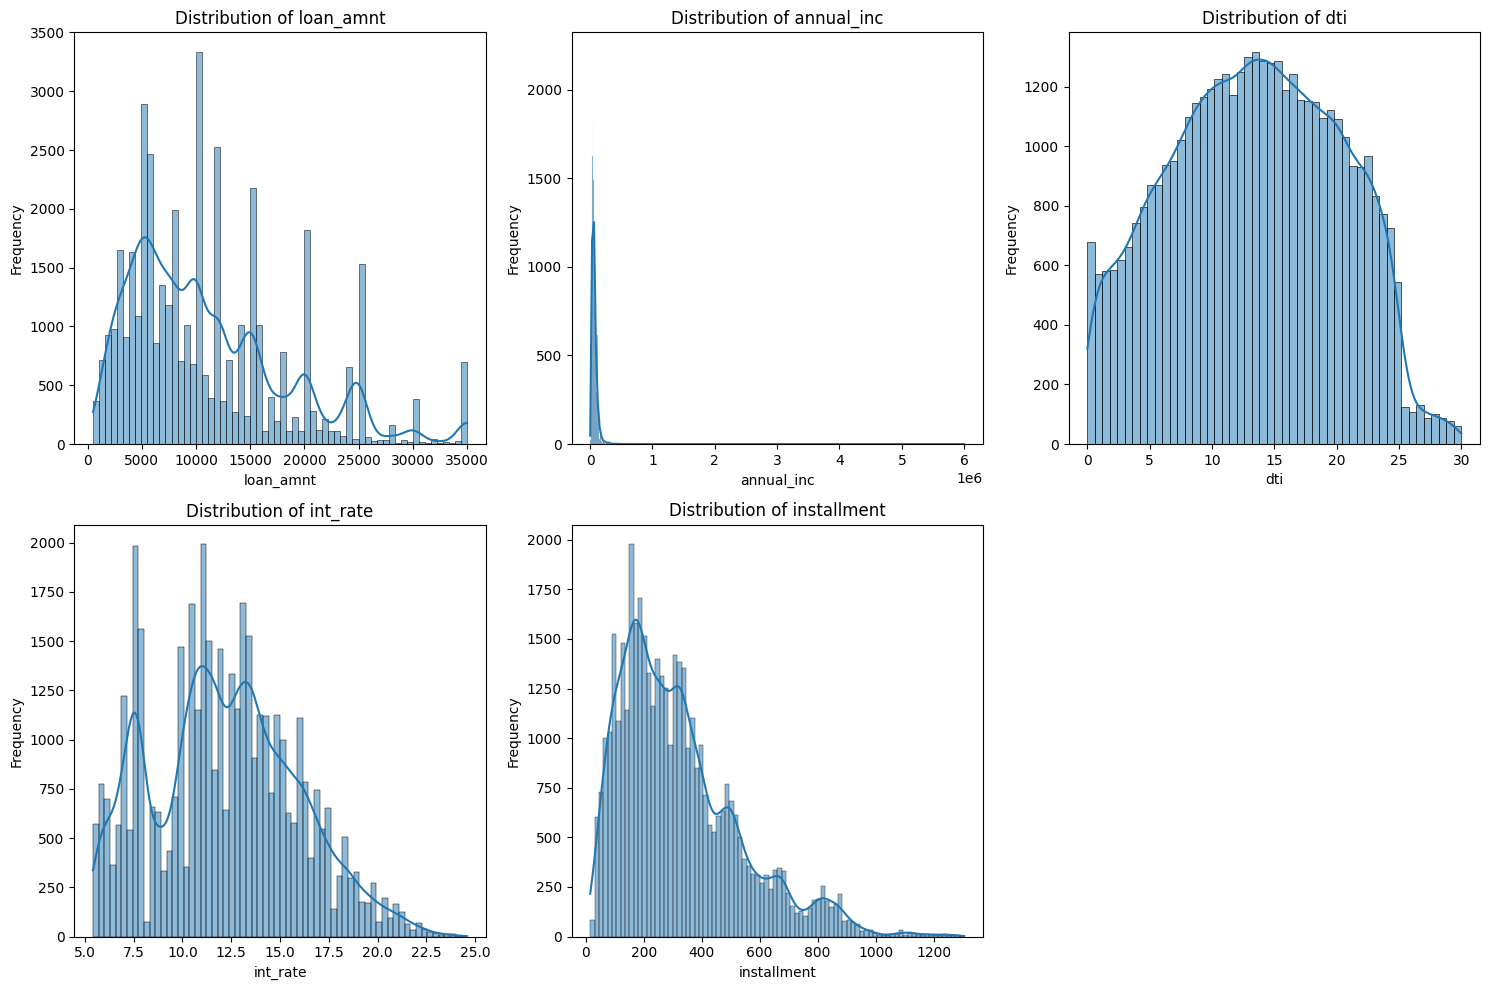

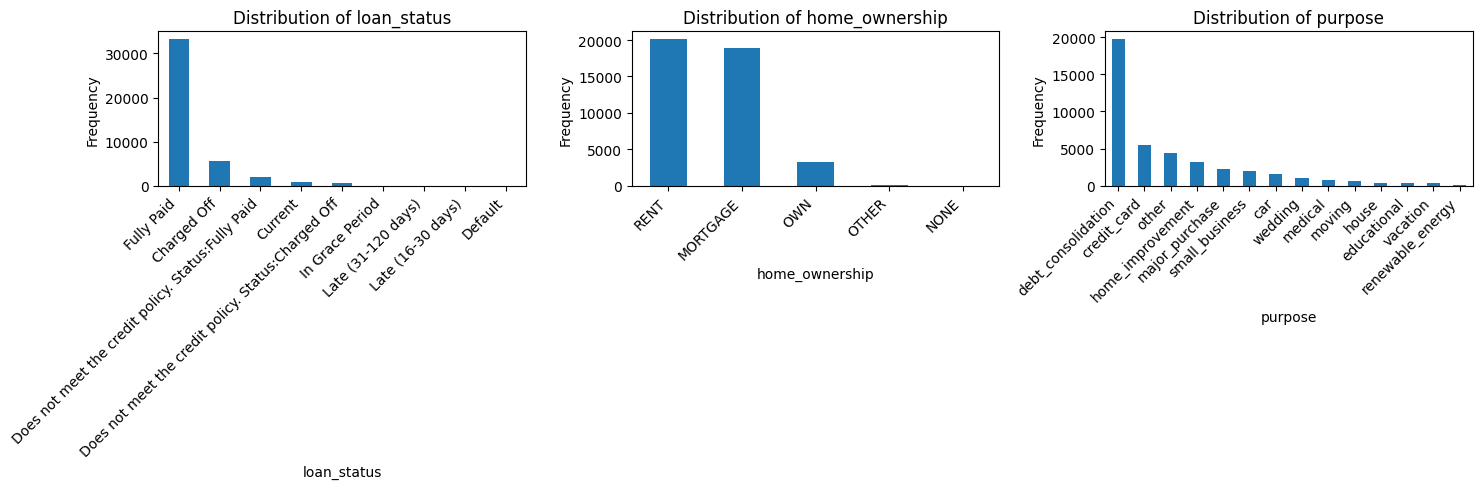

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features for histograms
numerical_features = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'installment']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    if feature == 'int_rate':
        # Clean and convert 'int_rate' to numeric
        df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%').astype(float)
        sns.histplot(df[feature], kde=True)
    else:
        sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Categorical features for bar plots
categorical_features = ['loan_status', 'home_ownership', 'purpose']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform a more in-depth analysis of the dataset, focusing on numerical and categorical features, and identify potential relationships between variables.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze categorical features, compute the correlation matrix, and analyze the target variable.



Descriptive Statistics for Numerical Features:
           member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  4.253500e+04  42535.000000  42535.000000     42535.000000   
mean   8.257026e+05  11089.722581  10821.585753     10139.830603   
std    2.795409e+05   7410.938391   7146.914675      7131.686446   
min    7.047300e+04    500.000000    500.000000         0.000000   
25%    6.384795e+05   5200.000000   5000.000000      4950.000000   
50%    8.241780e+05   9700.000000   9600.000000      8500.000000   
75%    1.033946e+06  15000.000000  15000.000000     14000.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

           int_rate   installment    annual_inc           dti   delinq_2yrs  \
count  42535.000000  42535.000000  4.253100e+04  42535.000000  42506.000000   
mean      12.165016    322.623063  6.913656e+04     13.373043      0.152449   
std        3.707936    208.927216  6.409635e+04      6.726315      0.512406   
min        5.420000    

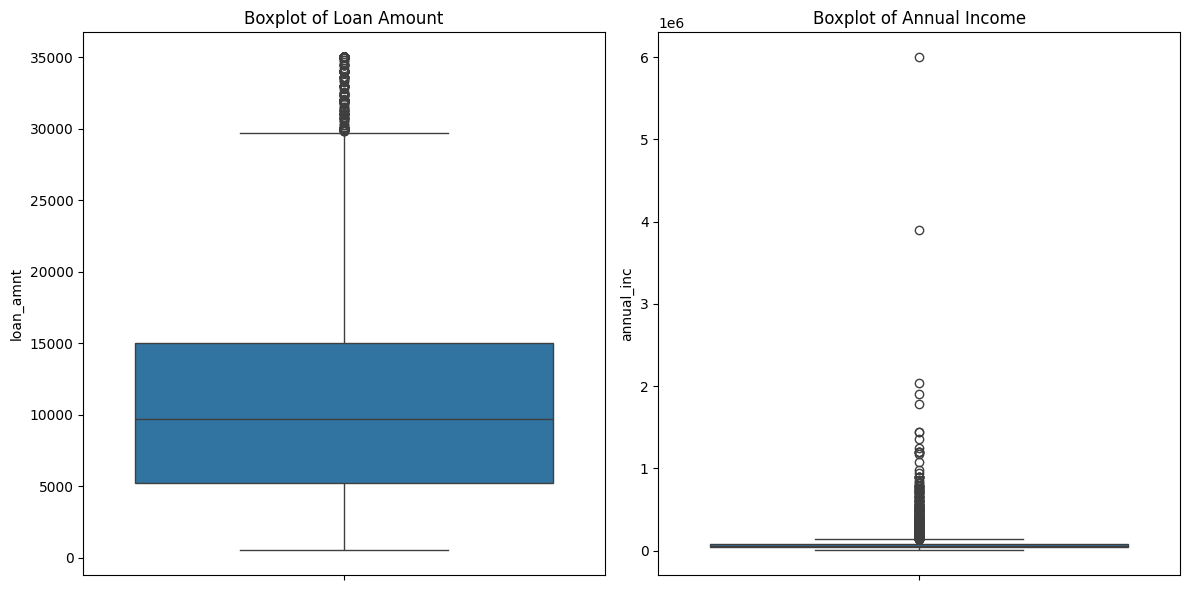


Value Counts for id:
id
70686      1
1077501    1
1077430    1
1077175    1
1076863    1
          ..
1064687    1
1069908    1
1070078    1
1071570    1
1071795    1
Name: count, Length: 42536, dtype: int64

Value Counts for term:
term
36 months    31534
60 months    11001
Name: count, dtype: int64

Value Counts for grade:
grade
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: count, dtype: int64

Value Counts for sub_grade:
sub_grade
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: count, dtype: int64

Value Counts for emp_title:
emp_title
US Army                                  139
Bank of America               

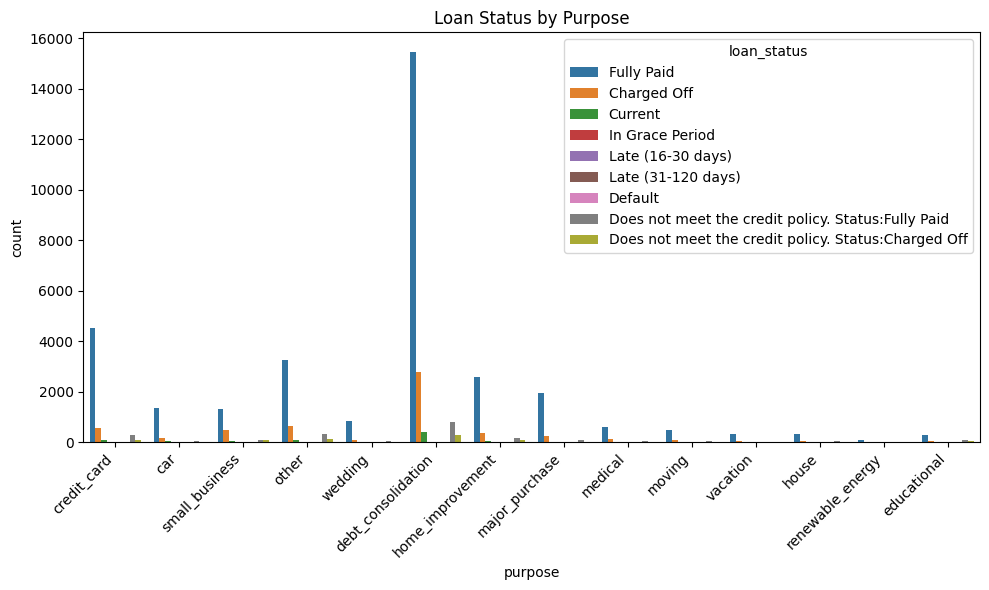

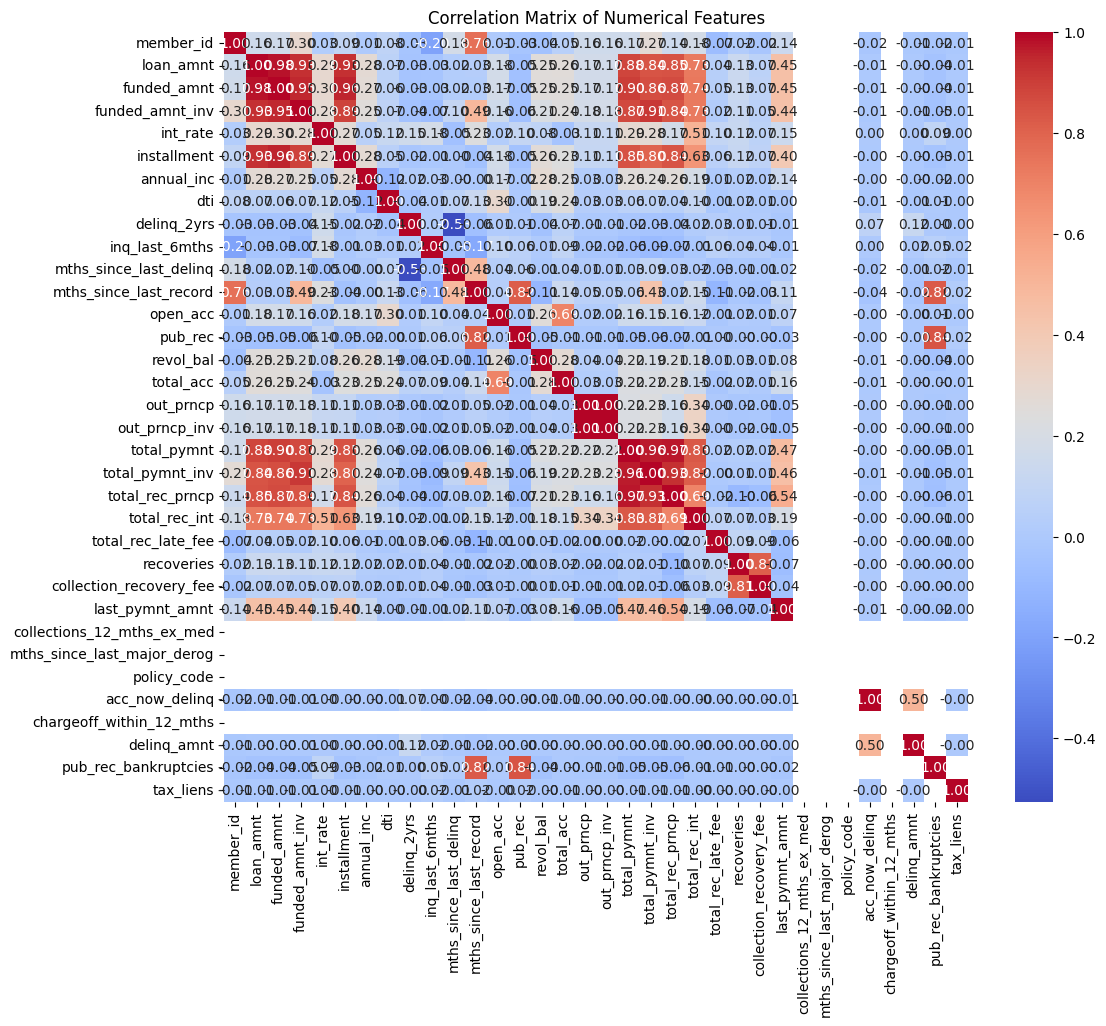


Loan Status Counts:
 loan_status
Fully Paid                                             33314
Charged Off                                             5640
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  781
Does not meet the credit policy. Status:Charged Off      761
In Grace Period                                           22
Late (31-120 days)                                        17
Late (16-30 days)                                          8
Default                                                    4
Name: count, dtype: int64

Average Loan Amount by Loan Status:
 loan_status
Charged Off                                            12117.566489
Current                                                17622.887324
Default                                                15000.000000
Does not meet the credit policy. Status:Charged Off     9527.233903
Does not meet the credit policy. Status:Fully Paid      8853.231891
F

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Numerical Features
numerical_cols = df.select_dtypes(include=['number']).columns
descriptive_stats = df[numerical_cols].describe()
print("Descriptive Statistics for Numerical Features:\n", descriptive_stats)

# Identify potential outliers (example using boxplots for a few key columns)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['annual_inc'])
plt.title('Boxplot of Annual Income')
plt.tight_layout()
plt.show()


# 2. Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")

# Example: Explore relationship between loan_status and purpose
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('Loan Status by Purpose')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 4. Target Variable Analysis
loan_status_counts = df['loan_status'].value_counts()
print("\nLoan Status Counts:\n", loan_status_counts)

# Example: Average loan amount for different loan statuses
average_loan_by_status = df.groupby('loan_status')['loan_amnt'].mean()
print("\nAverage Loan Amount by Loan Status:\n", average_loan_by_status)

## Summary:

### 1. Q&A
The provided data analysis task does not explicitly pose questions. However, the analysis implicitly explores questions like:

* What are the key characteristics of the loan dataset?
* Are there any missing values or outliers in the data?
* What are the distributions of key numerical and categorical features?
* How do numerical features correlate with each other?
* What is the relationship between loan purpose and loan status?
* How does the loan amount vary based on the loan status?


### 2. Data Analysis Key Findings

* **Missing Data:** Several columns have a high percentage of missing values.  `mths_since_last_record` (91.4%), `next_pymnt_d` (91.6%), and `mths_since_last_major_derog` (100%) have the most missing data.  Other columns with substantial missing data include `mths_since_last_delinq` (63.3%), `emp_title` (6.2%), `revol_util` (21.6%), and `pub_rec_bankruptcies` (3.2%).  This missingness needs to be addressed before further analysis or modelling.
* **Data Type Issues:**  The `int_rate` column was initially loaded as an object (string) type due to the presence of the percentage symbol.  Data cleaning and conversion to numeric type were necessary for numerical analysis. Other columns may have similar data type issues that require attention.
* **Outliers:** Potential outliers were observed in `annual_inc` and `loan_amnt`, as indicated by boxplots. Further investigation is needed to determine whether these are true outliers or valid data points.
* **Loan Status Distribution:** The analysis of the `loan_status` variable reveals the frequencies of different loan outcomes (e.g., "Fully Paid", "Charged Off").
* **Loan Amount and Loan Status:** The average loan amount varies across different loan statuses, suggesting a potential relationship between loan amount and loan outcome.  Specifically, the analysis of average loan amounts by loan status provides insight into possible connections between loan size and default risk.

### 3. Insights or Next Steps

* **Data Cleaning and Preprocessing:**  Address the missing values using appropriate imputation techniques or removal strategies.  Further investigate and correct data type issues for all relevant columns.  Consider outlier treatment to improve the reliability of statistical analyses.
* **Feature Engineering and Model Development:**  Based on the identified relationships between variables, consider creating new features and develop predictive models to understand the factors driving loan defaults or other loan outcomes.
